### Why Ordinary Least Squares (OLS) Fails
OLS fails primarily due to **overfitting** in the presence of noise, **multicollinearity** (high correlation between predictors), and **lack of regularization**. Without regularization, OLS can produce large, unstable coefficients, especially when there are many predictors or high multicollinearity, leading to poor generalization on new data.

### Ridge Regression (L2 Regularization)
The cost function for Ridge regression is given by:

$$
J(\beta) = \|y - X\beta\|^2 + \lambda \|\beta\|^2
$$

The gradient of this cost function is:

$$
\nabla J(\beta) = -2X^T(y - X\beta) + 2\lambda \beta
$$

- **Advantages**:
  - Stabilizes the solution in the presence of multicollinearity.
  - Provides a unique solution for $\lambda > 0$.
  - Helps prevent overfitting by shrinking the coefficients.

- **Disadvantages**:
  - Does not perform feature selection.
  - Can introduce bias if $\lambda$ is too large.

### Lasso Regression (L1 Regularization)
The cost function for Lasso regression is:

$$
J(\beta) = \|y - X\beta\|^2 + \lambda \|\beta\|_1
$$

The gradient of this cost function is:

$$
\nabla J(\beta) = -2X^T(y - X\beta) + \lambda \, \text{sign}(\beta)
$$

- **Advantages**:
  - Automatically performs feature selection by setting some coefficients to zero.
  - Improves interpretability by focusing on key features.

- **Disadvantages**:
  - Struggles with correlated features, often selecting only one from a correlated group.
  - Can introduce bias, especially with small datasets or large $\lambda$.

### ElasticNet Regression
The cost function for ElasticNet regression is:

$$
J(\beta) = \|y - X\beta\|^2 + \lambda_1 \|\beta\|_1 + \lambda_2 \|\beta\|^2
$$

The gradient of this cost function is:

$$
\nabla J(\beta) = -2X^T(y - X\beta) + \lambda_1 \, \text{sign}(\beta) + 2\lambda_2 \beta
$$

- **Advantages**:
  - Combines Lasso and Ridge regularization, performing both feature selection and coefficient shrinkage.
  - Handles correlated predictors better by keeping them with smaller coefficients.
  - Flexible in adjusting $\lambda_1/\lambda_2$ to resemble Lasso or Ridge.
  
- **Disadvantages**:
  - Requires tuning two hyperparameters, $\lambda_1$ and $\lambda_2$.
  - Computationally expensive due to additional penalty terms.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet
)
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(47)
plt.style.use('dark_background')

In [3]:
# Data preparation
n_samples = 500
x1 = np.random.randint(1, 100, n_samples)
x2 = np.random.randint(-50, 50, n_samples)
x3 = 0.5 * x1 + 0.3 * x2 + np.random.randint(0, 10, n_samples)
x4 = np.random.randint(200, 500, n_samples)
y = 2 + 3*x1 - 5*x2 + 2 * x3 + 0.1 * x4 + np.random.normal(0, 100, n_samples)

In [4]:
data = pd.DataFrame(dict(
    x1=x1, x2=x2, x3=x3, x4=x4, y=y
))
data.sample(5)

,x1,x2,x3,x4,y
308,74,-42,24.4,228,563.123508
442,53,-11,26.2,371,213.289690
175,55,23,36.4,242,159.741547
187,22,13,23.9,333,-6.538737
425,42,-10,27.0,277,389.561870


<Figure size 3000x3000 with 0 Axes>

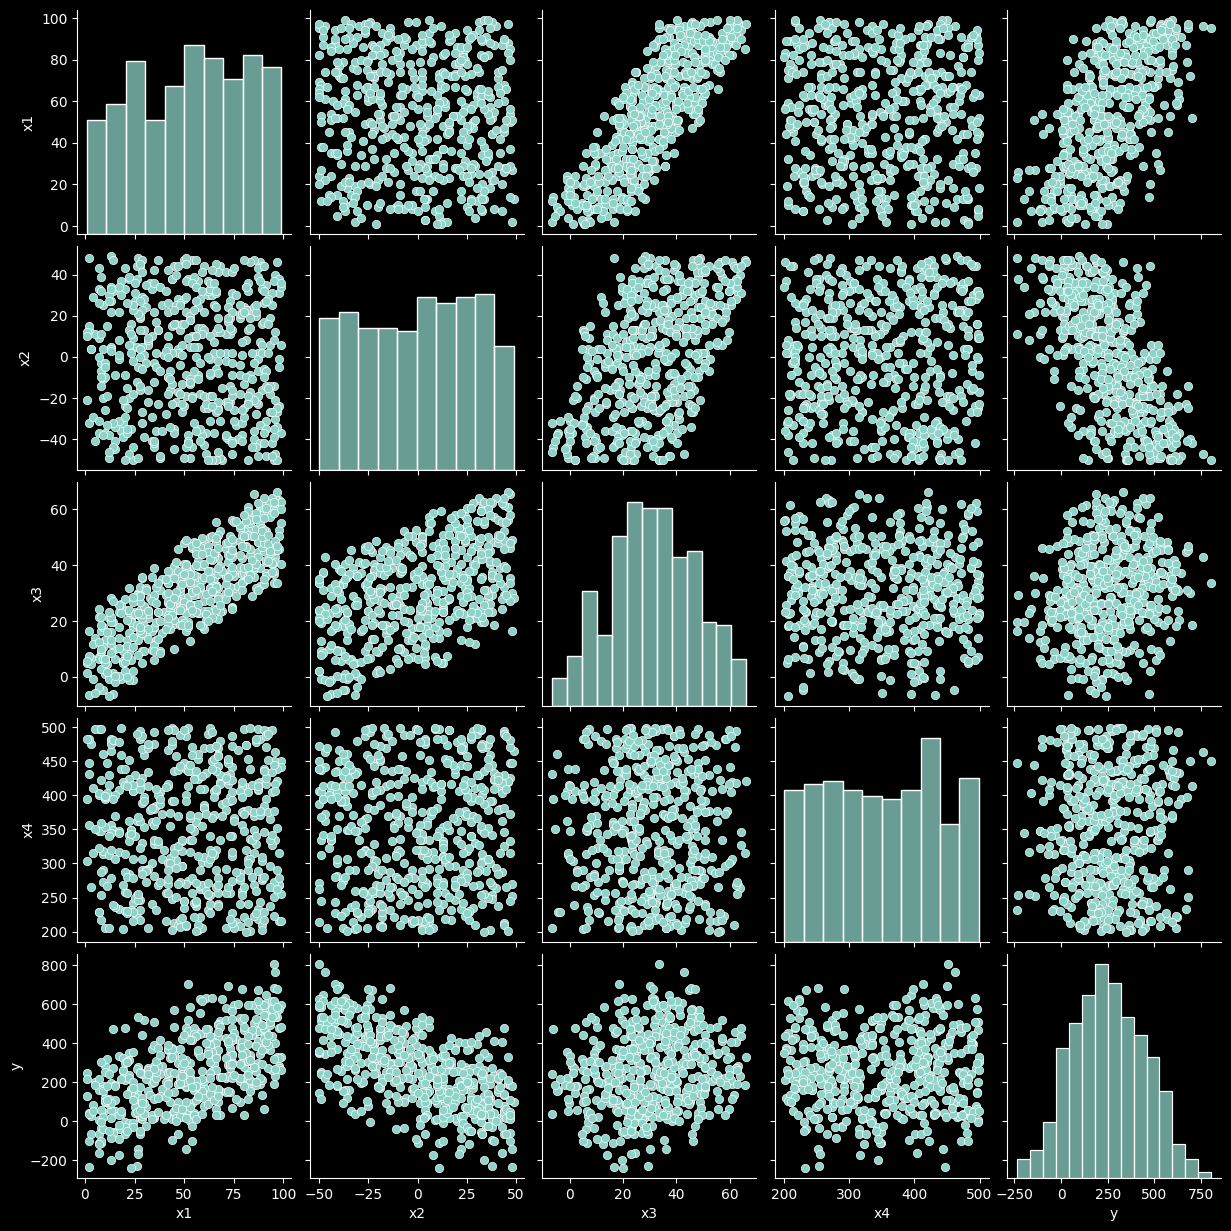

In [5]:
plt.figure(figsize=(10, 10), dpi=300)
sns.pairplot(data)
plt.show()
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1), 
    data['y'], test_size=0.2, random_state=47
)

In [7]:
models = {
    "OLS": LinearRegression(),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Fit the models and predict
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = [mse, r2]
    
print("\nMean Squared Error and Coefficient of Determination:")
for model_name, o in results.items():
    print(f"{model_name} MSE: {o[0]}, R^2: {o[1]}")


Mean Squared Error and Coefficient of Determination:
OLS MSE: 11629.803270170243, R^2: 0.644123156676849
Ridge MSE: 11629.78725468109, R^2: 0.6441236467575142
Lasso MSE: 11629.55009148034, R^2: 0.6441309040506322
ElasticNet MSE: 11629.358870596647, R^2: 0.6441367554896364
